# Analysis for Manual Subtitles

In [1]:
#importing a file and converting it into a dataframe
import webvtt
import pandas as pd
import string
import matplotlib.pyplot as plt
import jiwer
import difflib

# Load the VTT file into a DataFrame
data = []

for caption in webvtt.read('manual_sub/Lecture1SetsSetOperationsandMathematicalInduction_manual.en-j3PyPqV-e1s.vtt'):
    data.append({
        'start': caption.start,
        'end': caption.end,
        'text': caption.text.strip()
    })

manual_df = pd.DataFrame(data)

In [2]:
#converting datetime into seconds for easier calculations
from datetime import datetime
def time_to_seconds(time_str):
    fmt = '%H:%M:%S.%f'
    time_obj = datetime.strptime(time_str, fmt)
    return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second + time_obj.microsecond / 1_000_000

manual_df['start_seconds'] = manual_df['start'].apply(time_to_seconds)
manual_df['end_seconds'] = manual_df['end'].apply(time_to_seconds)

# Calculate duration of each caption
manual_df['duration'] = manual_df['end_seconds'] - manual_df['start_seconds']

In [3]:
manual_df

,start,end,text,start_seconds,end_seconds,duration
0,00:00:00.000,00:00:12.820,[SQUEAKING]\n[RUSTLING] [CLICKING],0.000,12.820,12.820
1,00:00:12.820,00:00:15.180,CASEY RODRIGUEZ: OK.,12.820,15.180,2.360
2,00:00:15.180,00:00:19.940,"So I have to admit this\nis extremely awkward,",15.180,19.940,4.760
3,00:00:19.940,00:00:21.998,lecturing to an empty room.,19.940,21.998,2.058
4,00:00:21.998,00:00:23.540,So I have to imagine\nthere's somebody,21.998,23.540,1.542
...,...,...,...,...,...,...
844,01:13:12.550,01:13:19.650,This is bigger than or\nequal to 1 m plus 1 ti...,4392.550,4399.650,7.100
845,01:13:22.250,01:13:30.300,"Thus, 1 plus c to the m plus\n1 is greater tha...",4402.250,4410.300,8.050
846,01:13:30.300,01:13:32.690,which is the n\nequals n plus 1 case.,4410.300,4412.690,2.390
847,01:13:46.540,01:13:58.440,"So by induction, this inequality\ntriple star ...",4426.540,4438.440,11.900


In [4]:
total_caption_time = manual_df['duration'].sum()
total_video_time = manual_df['end_seconds'].max()
caption_ratio = total_caption_time / total_video_time

print(f'Total Caption Time: {total_caption_time} seconds')
print(f'Total Video Time: {total_video_time} seconds')
print(f'Percentage of video with captions: {caption_ratio * 100:.2f}%')

Total Caption Time: 3833.6270000000004 seconds
Total Video Time: 4455.39 seconds
Percentage of video with captions: 86.04%


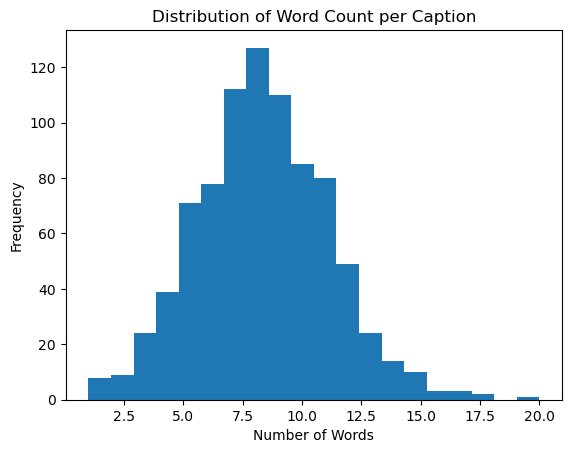

In [5]:
manual_df['word_count'] = manual_df['text'].apply(lambda x: len(x.split()))
plt.hist(manual_df['word_count'], bins=20)
plt.title('Distribution of Word Count per Caption')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

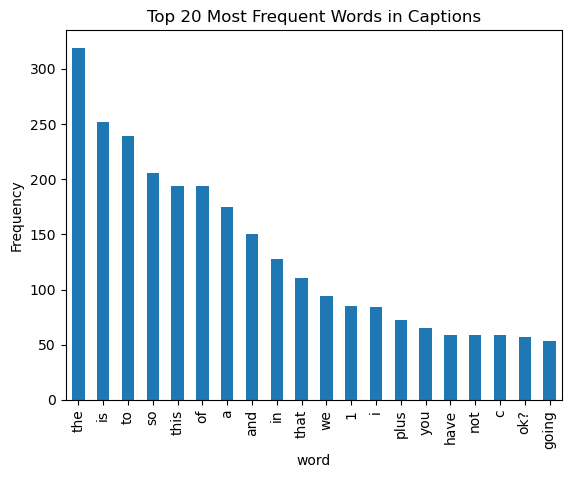

In [6]:
from collections import Counter

all_text = ' '.join(manual_df['text']).lower().split()
word_freq = Counter(all_text)

# Plot top 20 most frequent words
common_words = pd.DataFrame(word_freq.most_common(20), columns=['word', 'count'])
common_words.plot(kind='bar', x='word', y='count', legend=False)
plt.title('Top 20 Most Frequent Words in Captions')
plt.ylabel('Frequency')
plt.show()

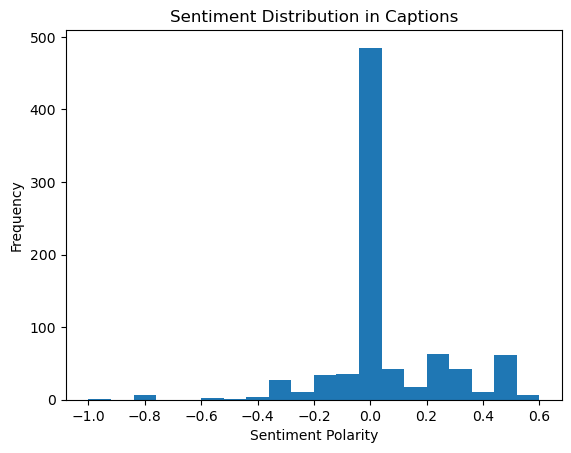

In [7]:
from textblob import TextBlob

manual_df['sentiment'] = manual_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.hist(manual_df['sentiment'], bins=20)
plt.title('Sentiment Distribution in Captions')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

In [8]:
manual_df.head(10)

,start,end,text,start_seconds,end_seconds,duration,word_count,sentiment
0,00:00:00.000,00:00:12.820,[SQUEAKING]\n[RUSTLING] [CLICKING],0.000,12.820,12.820,3,0.0000
1,00:00:12.820,00:00:15.180,CASEY RODRIGUEZ: OK.,12.820,15.180,2.360,3,0.5000
2,00:00:15.180,00:00:19.940,"So I have to admit this\nis extremely awkward,",15.180,19.940,4.760,9,-0.6000
3,00:00:19.940,00:00:21.998,lecturing to an empty room.,19.940,21.998,2.058,5,-0.1000
4,00:00:21.998,00:00:23.540,So I have to imagine\nthere's somebody,21.998,23.540,1.542,7,0.0000
5,00:00:23.540,00:00:26.150,on the other end actually\nlistening to me at ...,23.540,26.150,2.610,11,-0.0625
6,00:00:29.170,00:00:32.380,Perhaps this is what YouTube\nstars have to go...,29.170,32.380,3.210,10,0.0000
7,00:00:32.380,00:00:33.630,at some point in their career.,32.380,33.630,1.250,6,0.0000
8,00:00:36.280,00:00:38.510,So what is the purpose\nof this course?,36.280,38.510,2.230,8,0.0000
9,00:00:38.510,00:00:51.770,"So this is for 18\n100A, Real Analysis.",38.510,51.770,13.260,8,0.2000


Total word count of the file:  6998


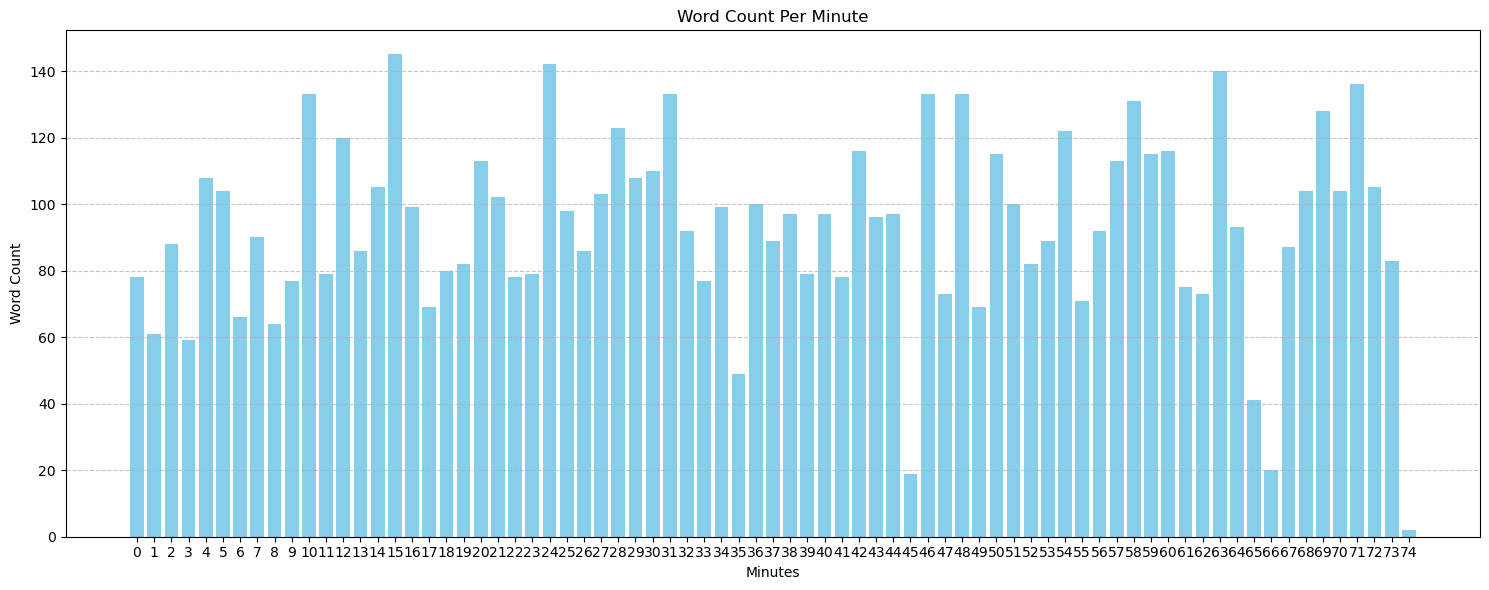

In [15]:
import webvtt
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

def calculate_word_count(vtt_file):
    total_word_count = 0
    for caption in webvtt.read(vtt_file):
        word_count = len(caption.text.strip().split())
        total_word_count += word_count
    
    return total_word_count

def time_to_seconds(timestamp):
    time_obj = datetime.strptime(timestamp, '%H:%M:%S.%f')
    return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second + time_obj.microsecond / 1_000_000

# Function to calculate word count per minute
def calculate_word_count_per_minute(vtt_file):
    captions_data = []
    for caption in webvtt.read(vtt_file):
        start_seconds = time_to_seconds(caption.start)
        word_count = len(caption.text.strip().split())
        captions_data.append((start_seconds, word_count))
    
    words_per_minute = {}
    
    # Calculate word count for each minute
    for start_time, word_count in captions_data:
        minute = int(start_time // 60)  # Convert seconds to minute index
        if minute not in words_per_minute:
            words_per_minute[minute] = 0
        words_per_minute[minute] += word_count
    
    return words_per_minute

# plot histogram for word count per minute
def plot_word_count_histogram(words_per_minute):
    minutes = sorted(words_per_minute.keys())
    word_counts = [words_per_minute[minute] for minute in minutes]

    plt.figure(figsize=(15, 6))
    plt.bar(minutes, word_counts, color='skyblue')
    plt.xlabel('Minutes')
    plt.ylabel('Word Count')
    plt.title('Word Count Per Minute')
    plt.xticks(np.arange(min(minutes), max(minutes) + 1, 1))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

vtt_file = 'manual_sub/Lecture1SetsSetOperationsandMathematicalInduction_manual.en-j3PyPqV-e1s.vtt'
words_per_minute = calculate_word_count_per_minute(vtt_file)
total_words = calculate_word_count(vtt_file)
print("Total word count of the file: ",total_words)
plot_word_count_histogram(words_per_minute)


In [16]:
manual_df['text'] = manual_df['text'].str.replace('\n', ' ', regex=False)
manual_df['text'] = manual_df['text'].str.replace(r'\[.*?\]|\(.*?\)', '', regex=True)
manual_df['text'] = manual_df['text'].str.translate(str.maketrans('', '', string.punctuation))
manual_df['text'] = manual_df['text'].str.lower()

In [17]:
manual_df['Tokens'] = manual_df['text'].str.split()

In [18]:
manual_df.head()

,start,end,text,start_seconds,end_seconds,duration,word_count,sentiment,Tokens
0,00:00:00.000,00:00:12.820,,0.000,12.820,12.820,3,0.0,[]
1,00:00:12.820,00:00:15.180,casey rodriguez ok,12.820,15.180,2.360,3,0.5,"[casey, rodriguez, ok]"
2,00:00:15.180,00:00:19.940,so i have to admit this is extremely awkward,15.180,19.940,4.760,9,-0.6,"[so, i, have, to, admit, this, is, extremely, ..."
3,00:00:19.940,00:00:21.998,lecturing to an empty room,19.940,21.998,2.058,5,-0.1,"[lecturing, to, an, empty, room]"
4,00:00:21.998,00:00:23.540,so i have to imagine theres somebody,21.998,23.540,1.542,7,0.0,"[so, i, have, to, imagine, theres, somebody]"


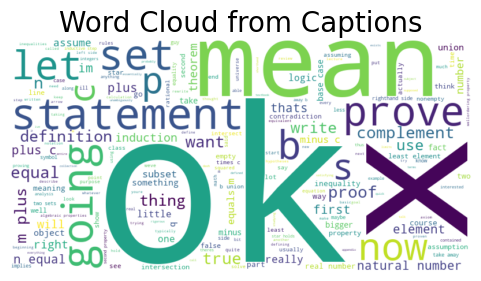

In [19]:
from wordcloud import WordCloud
text = ' '.join(manual_df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(7, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud from Captions', fontsize=20)
plt.show()

# Analysis for Whisper Subtitles

In [20]:
data = []

for caption in webvtt.read('whisper_sub/Lecture1SetsSetOperationsandMathematicalInduction.vtt'):
    data.append({
        'start': caption.start,
        'end': caption.end,
        'text': caption.text.strip()
    })

whisper_df = pd.DataFrame(data)

In [21]:
from datetime import datetime
def time_to_seconds(time_str):
    fmt = '%H:%M:%S.%f'
    time_obj = datetime.strptime(time_str, fmt)
    return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second + time_obj.microsecond / 1_000_000

whisper_df['start_seconds'] = whisper_df['start'].apply(time_to_seconds)
whisper_df['end_seconds'] = whisper_df['end'].apply(time_to_seconds)
whisper_df['duration'] = whisper_df['end_seconds'] - whisper_df['start_seconds']

In [22]:
total_caption_time = whisper_df['duration'].sum()
total_video_time = whisper_df['end_seconds'].max()
caption_ratio = total_caption_time / total_video_time

print(f'Total Caption Time: {total_caption_time} seconds')
print(f'Total Video Time: {total_video_time} seconds')
print(f'Percentage of video with captions: {caption_ratio * 100:.2f}%')

Total Caption Time: 3687.8399999999974 seconds
Total Video Time: 4453.98 seconds
Percentage of video with captions: 82.80%


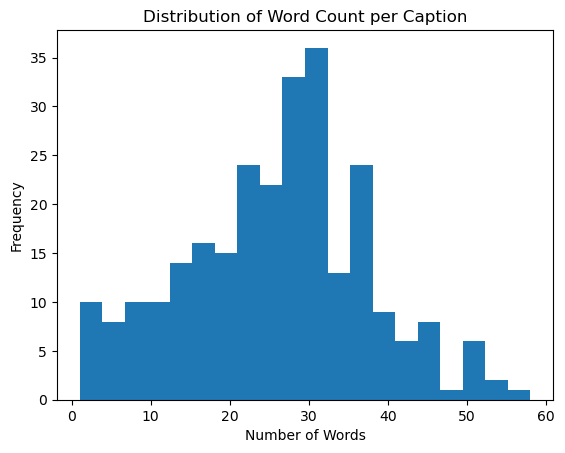

In [23]:
whisper_df['word_count'] = whisper_df['text'].apply(lambda x: len(x.split()))
plt.hist(whisper_df['word_count'], bins=20)
plt.title('Distribution of Word Count per Caption')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

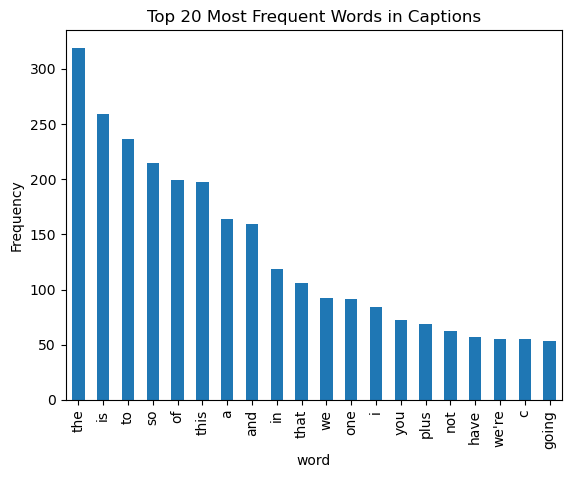

In [24]:
from collections import Counter

all_text = ' '.join(whisper_df['text']).lower().split()
word_freq = Counter(all_text)

# Plot top 20 most frequent words
common_words = pd.DataFrame(word_freq.most_common(20), columns=['word', 'count'])
common_words.plot(kind='bar', x='word', y='count', legend=False)
plt.title('Top 20 Most Frequent Words in Captions')
plt.ylabel('Frequency')
plt.show()

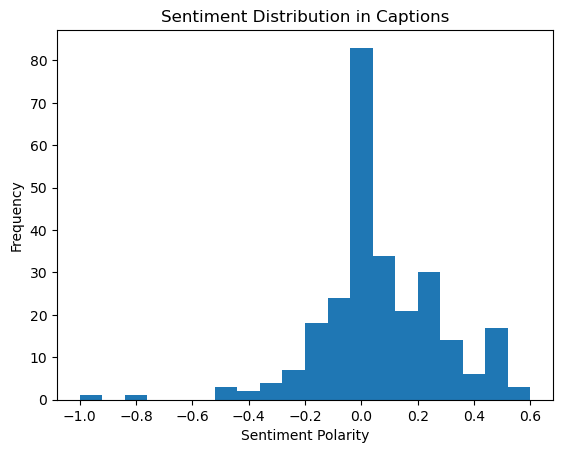

In [25]:
from textblob import TextBlob

whisper_df['sentiment'] = whisper_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.hist(whisper_df['sentiment'], bins=20)
plt.title('Sentiment Distribution in Captions')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

In [26]:
whisper_df.head(10)

,start,end,text,start_seconds,end_seconds,duration,word_count,sentiment
0,00:00:12.540,00:00:22.440,Okay. So I have to admit this is extremely awk...,12.54,22.44,9.90,18,-0.066667
1,00:00:22.440,00:00:25.920,to imagine there's somebody on the other end a...,22.44,25.92,3.48,15,-0.062500
2,00:00:28.660,00:00:37.060,Perhaps this is what YouTube stars have to go ...,28.66,37.06,8.40,19,0.000000
3,00:00:37.060,00:00:54.720,the purpose of this course? So this is for 180...,37.06,54.72,17.66,20,0.200000
4,00:01:02.600,00:01:23.100,The really I think the first primary purpose o...,62.60,83.10,20.50,23,0.337500
5,00:01:23.100,00:01:38.540,"read a proof, being able to write a proof. And...",83.10,98.54,15.44,29,0.337500
6,00:01:38.540,00:01:58.220,"prove statements about real numbers, functions...",98.54,118.22,19.68,8,0.200000
7,00:02:06.800,00:02:28.200,"Okay. So the second part, this is the analysis...",126.80,148.20,21.40,27,0.210000
8,00:02:28.200,00:02:48.240,"kind of review. And for most of you, a lot of ...",148.20,168.24,20.04,43,0.256250
9,00:02:48.240,00:03:10.100,So the first set of objects we're going to def...,168.24,190.10,21.86,28,0.250000


Total word count of the file:  6906


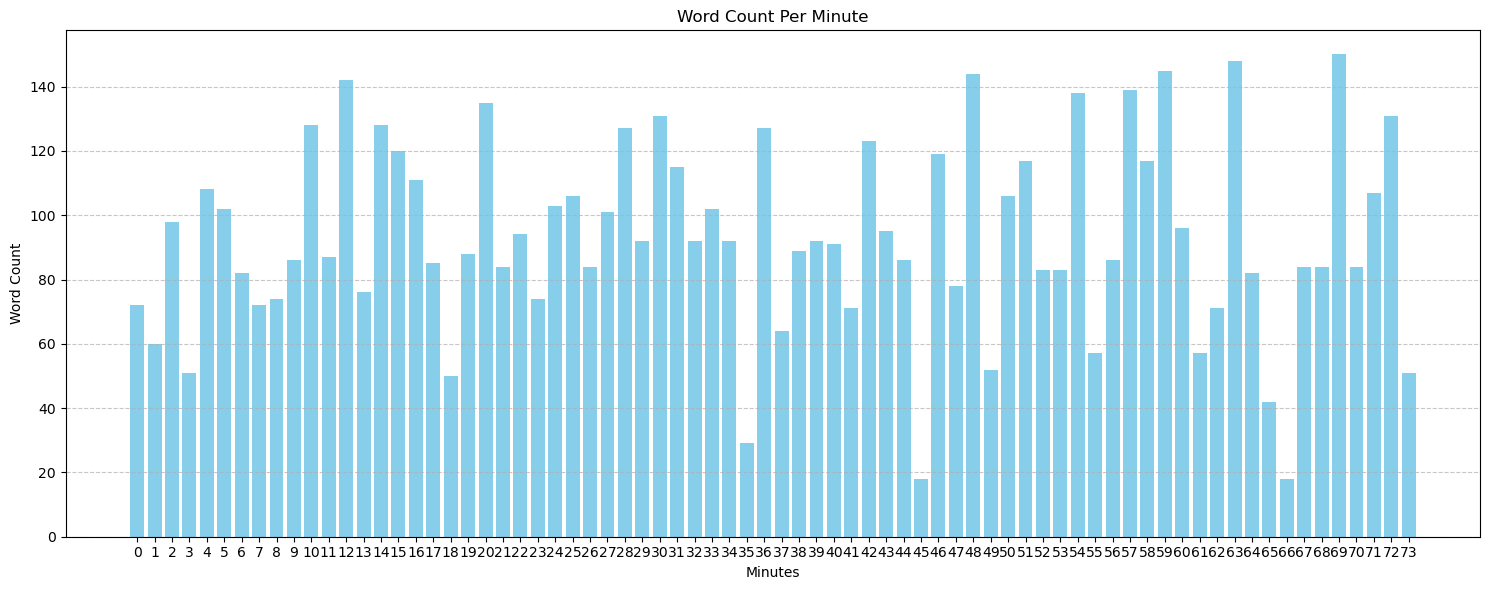

In [27]:
import webvtt
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

def calculate_word_count(vtt_file):
    total_word_count = 0
    
    for caption in webvtt.read(vtt_file):
        word_count = len(caption.text.strip().split())
        total_word_count += word_count
    
    return total_word_count

def time_to_seconds(timestamp):
    time_obj = datetime.strptime(timestamp, '%H:%M:%S.%f')
    return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second + time_obj.microsecond / 1_000_000

def calculate_word_count_per_minute(vtt_file):
    captions_data = []
    
    for caption in webvtt.read(vtt_file):
        start_seconds = time_to_seconds(caption.start)
        word_count = len(caption.text.strip().split())
        captions_data.append((start_seconds, word_count))
    
    words_per_minute = {}
    
    for start_time, word_count in captions_data:
        minute = int(start_time // 60) 
        if minute not in words_per_minute:
            words_per_minute[minute] = 0
        words_per_minute[minute] += word_count
    
    return words_per_minute

# Function to plot histogram for word count per minute
def plot_word_count_histogram(words_per_minute):
    minutes = sorted(words_per_minute.keys())
    word_counts = [words_per_minute[minute] for minute in minutes]

    plt.figure(figsize=(15, 6))
    plt.bar(minutes, word_counts, color='skyblue')
    plt.xlabel('Minutes')
    plt.ylabel('Word Count')
    plt.title('Word Count Per Minute')
    plt.xticks(np.arange(min(minutes), max(minutes) + 1, 1))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

vtt_file = 'whisper_sub/Lecture1SetsSetOperationsandMathematicalInduction.vtt'
words_per_minute = calculate_word_count_per_minute(vtt_file)
total_words = calculate_word_count(vtt_file)
print("Total word count of the file: ",total_words)
plot_word_count_histogram(words_per_minute)


In [28]:
whisper_df['text'] = whisper_df['text'].str.replace('\n', ' ', regex=False)
whisper_df['text'] = whisper_df['text'].str.replace(r'\[.*?\]|\(.*?\)', '', regex=True)
whisper_df['text'] = whisper_df['text'].str.translate(str.maketrans('', '', string.punctuation))
whisper_df['text'] = whisper_df['text'].str.lower()

In [29]:
whisper_df['Tokens'] = whisper_df['text'].str.split()

In [30]:
whisper_df.head()

,start,end,text,start_seconds,end_seconds,duration,word_count,sentiment,Tokens
0,00:00:12.540,00:00:22.440,okay so i have to admit this is extremely awkw...,12.54,22.44,9.90,18,-0.066667,"[okay, so, i, have, to, admit, this, is, extre..."
1,00:00:22.440,00:00:25.920,to imagine theres somebody on the other end ac...,22.44,25.92,3.48,15,-0.062500,"[to, imagine, theres, somebody, on, the, other..."
2,00:00:28.660,00:00:37.060,perhaps this is what youtube stars have to go ...,28.66,37.06,8.40,19,0.000000,"[perhaps, this, is, what, youtube, stars, have..."
3,00:00:37.060,00:00:54.720,the purpose of this course so this is for 1800...,37.06,54.72,17.66,20,0.200000,"[the, purpose, of, this, course, so, this, is,..."
4,00:01:02.600,00:01:23.100,the really i think the first primary purpose o...,62.60,83.10,20.50,23,0.337500,"[the, really, i, think, the, first, primary, p..."


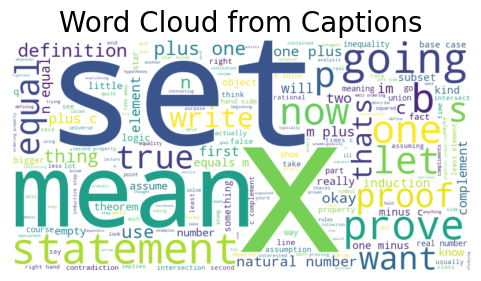

In [31]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = ' '.join(whisper_df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(7, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title('Word Cloud from Captions', fontsize=20)
plt.show()

In [32]:
import nltk
from nltk.translate.bleu_score import sentence_bleu

# Calculate BLEU score
#bleu_score = sentence_bleu(manual_text, whisper_text)

##  Creating a Dataframe with all the videos 

In [33]:
import os
import pandas as pd

def extract_text_from_vtt(file_path):
    """Extract text from a single VTT file."""
    text_lines = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            if line.strip() and not line.startswith("WEBVTT") and not line[0].isdigit():
                text_lines.append(line.strip())
    return " ".join(text_lines)  

def read_vtt_files_in_folder(folder_path):
    """Read all VTT files in the specified folder and return a DataFrame of their text."""
    data = []  
    for filename in os.listdir(folder_path):  
        if filename.endswith('.vtt'):  
            file_path = os.path.join(folder_path, filename)  
            try:
                text_content = extract_text_from_vtt(file_path)  
                data.append({"filename": filename, "text": text_content})  
            except Exception as e:
                print(f"Error reading {filename}: {e}")  
    
    df = pd.DataFrame(data)
    return df


In [34]:
folder_path = 'whisper_sub'
whisper_df_25 = read_vtt_files_in_folder(folder_path)
whisper_df_25['text'] = whisper_df_25['text'].str.replace('\n', ' ', regex=False)
whisper_df_25['text'] = whisper_df_25['text'].str.replace(r'\[.*?\]|\(.*?\)', '', regex=True)
whisper_df_25['text'] = whisper_df_25['text'].str.translate(str.maketrans('', '', string.punctuation))
whisper_df_25['text'] = whisper_df_25['text'].str.lower()

In [35]:
def extract_lecture_name(filename):
    return filename.split('.')[0]  

whisper_df_25['filename'] = whisper_df_25['filename'].apply(lambda x: extract_lecture_name(x.split('.')[0]))
whisper_df_25.rename(columns={'text': 'whisper_text'}, inplace=True)
whisper_df_25

,filename,whisper_text
0,Lec10SecondderivativetestboundariesinfinityMIT...,the following content is provided under a crea...
1,Lec11DifferentialschainruleMIT1802Multivariabl...,the following content is provided under a crea...
2,Lec12Gradientdirectionalderivativetangentplane...,the following content is provided under a crea...
3,Lec13LagrangemultipliersMIT1802MultivariableCa...,the following content is provided under a crea...
4,Lec14Non-independentvariablesMIT1802Multivaria...,the following content is provided under a crea...
5,Lec15PartialdifferentialequationsreviewMIT1802...,the following content is provided under a crea...
6,Lec16DoubleintegralsMIT1802MultivariableCalcul...,the following content is provided under a crea...
7,Lec17DoubleintegralsinpolarcoordsapplicationsM...,the following content is provided under a crea...
8,Lec18ChangeofvariablesMIT1802MultivariableCalc...,the following content is provided under a crea...
9,Lec19VectorfieldsandlineintegralsintheplaneMIT...,the following content is provided under a crea...


In [36]:
folder_path = 'manual_sub'
manual_df_25 = read_vtt_files_in_folder(folder_path)
manual_df_25['text'] = manual_df_25['text'].str.replace('\n', ' ', regex=False)
manual_df_25['text'] = manual_df_25['text'].str.replace(r'\[.*?\]|\(.*?\)', '', regex=True)
manual_df_25['text'] = manual_df_25['text'].str.translate(str.maketrans('', '', string.punctuation))
manual_df_25['text'] = manual_df_25['text'].str.lower()
manual_df_25['text'] = manual_df_25['text'].str.replace('kind captions language en', '', regex=False).str.strip()


In [37]:
def extract_lecture_name(filename):
    return filename.split('_')[0]  # Get the part before the first underscore

# Apply the function to the 'filename' column and create a new 'lecture_name' column
manual_df_25['filename'] = manual_df_25['filename'].apply(lambda x: extract_lecture_name(x.split('.')[0]))
manual_df_25.rename(columns={'text': 'manual_text'}, inplace=True)
manual_df_25

,filename,manual_text
0,Lec10SecondderivativetestboundariesinfinityMIT...,the following content is provided under a crea...
1,Lec11DifferentialschainruleMIT1802Multivariabl...,the following content is provided under a crea...
2,Lec12Gradientdirectionalderivativetangentplane...,the following content is provided under a crea...
3,Lec13LagrangemultipliersMIT1802MultivariableCa...,last time we saw things about gradients and di...
4,Lec14Non-independentvariablesMIT1802Multivaria...,the following content is provided under a crea...
5,Lec15PartialdifferentialequationsreviewMIT1802...,the following content is provided under a crea...
6,Lec16DoubleintegralsMIT1802MultivariableCalcul...,the following content is provided under a crea...
7,Lec17DoubleintegralsinpolarcoordsapplicationsM...,the following content is provided under a crea...
8,Lec18ChangeofvariablesMIT1802MultivariableCalc...,the following content is provided under a crea...
9,Lec19VectorfieldsandlineintegralsintheplaneMIT...,the following content is provided under a crea...


In [38]:
mergeddf=pd.merge(manual_df_25,whisper_df_25, on='filename')

In [39]:
def calculate_wer(reference, hypothesis):
    wer = jiwer.wer(reference, hypothesis)  # Calculate WER
    return wer
def calculate_mer(reference, hypothesis):
    mer = jiwer.mer(reference, hypothesis)  # Calculate MER
    return mer

In [40]:
mergeddf['WER'] = mergeddf.apply(lambda row: calculate_wer(row['manual_text'], row['whisper_text']), axis=1)
mergeddf['MER'] = mergeddf.apply(lambda row: calculate_mer(row['manual_text'], row['whisper_text']), axis=1)

In [41]:
mergeddf

,filename,manual_text,whisper_text,WER,MER
0,Lec10SecondderivativetestboundariesinfinityMIT...,the following content is provided under a crea...,the following content is provided under a crea...,0.146856,0.137960
1,Lec11DifferentialschainruleMIT1802Multivariabl...,the following content is provided under a crea...,the following content is provided under a crea...,0.161064,0.150746
2,Lec12Gradientdirectionalderivativetangentplane...,the following content is provided under a crea...,the following content is provided under a crea...,0.231809,0.200520
3,Lec13LagrangemultipliersMIT1802MultivariableCa...,last time we saw things about gradients and di...,the following content is provided under a crea...,0.217566,0.197323
4,Lec14Non-independentvariablesMIT1802Multivaria...,the following content is provided under a crea...,the following content is provided under a crea...,0.111503,0.106857
5,Lec15PartialdifferentialequationsreviewMIT1802...,the following content is provided under a crea...,the following content is provided under a crea...,0.145331,0.137562
6,Lec16DoubleintegralsMIT1802MultivariableCalcul...,the following content is provided under a crea...,the following content is provided under a crea...,0.151296,0.144226
7,Lec17DoubleintegralsinpolarcoordsapplicationsM...,the following content is provided under a crea...,the following content is provided under a crea...,0.193498,0.177650
8,Lec18ChangeofvariablesMIT1802MultivariableCalc...,the following content is provided under a crea...,the following content is provided under a crea...,0.146235,0.137539
9,Lec19VectorfieldsandlineintegralsintheplaneMIT...,the following content is provided under a crea...,the following content is provided under a crea...,0.207959,0.188401


In [42]:
np.mean(mergeddf['WER'])

0.15195800449243618

In [43]:
np.mean(mergeddf['MER'])

0.1394234203652953

In [45]:
import jiwer

def error_breakdown(reference, hypothesis):
    measures = jiwer.compute_measures(reference, hypothesis)
    return measures['insertions'], measures['deletions'], measures['substitutions']

mergeddf['insertions'], mergeddf['deletions'], mergeddf['substitutions'] = zip(*mergeddf.apply(lambda row: error_breakdown(row['manual_text'], row['whisper_text']), axis=1))

In [46]:
def character_error_rate(original, asr):
    return jiwer.cer(original, asr)

mergeddf['CER'] = mergeddf.apply(lambda row: character_error_rate(row['manual_text'], row['whisper_text']), axis=1)

In [47]:
mergeddf['original_caption_length'] = mergeddf['manual_text'].apply(lambda x: len(x.split()))
mergeddf['generated_captions_length'] = mergeddf['whisper_text'].apply(lambda x: len(x.split()))
mergeddf['word_count_diff'] = abs(mergeddf['original_caption_length'] - mergeddf['generated_captions_length'])


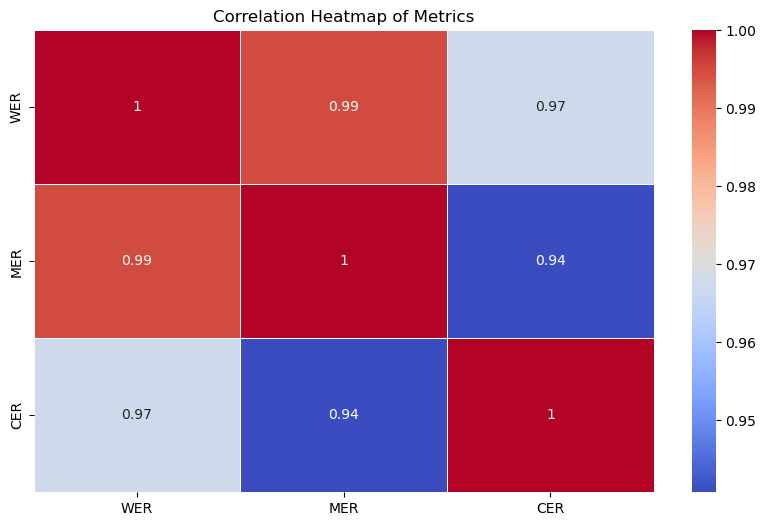

In [48]:
import seaborn as sns
# Correlation heatmap
plt.figure(figsize=(10, 6))
corr_matrix = mergeddf[['WER', 'MER', 'CER']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Metrics')
plt.show()

In [49]:
mergeddf.columns

Index(['filename', 'manual_text', 'whisper_text', 'WER', 'MER', 'insertions',
       'deletions', 'substitutions', 'CER', 'original_caption_length',
       'generated_captions_length', 'word_count_diff'],
      dtype='object')

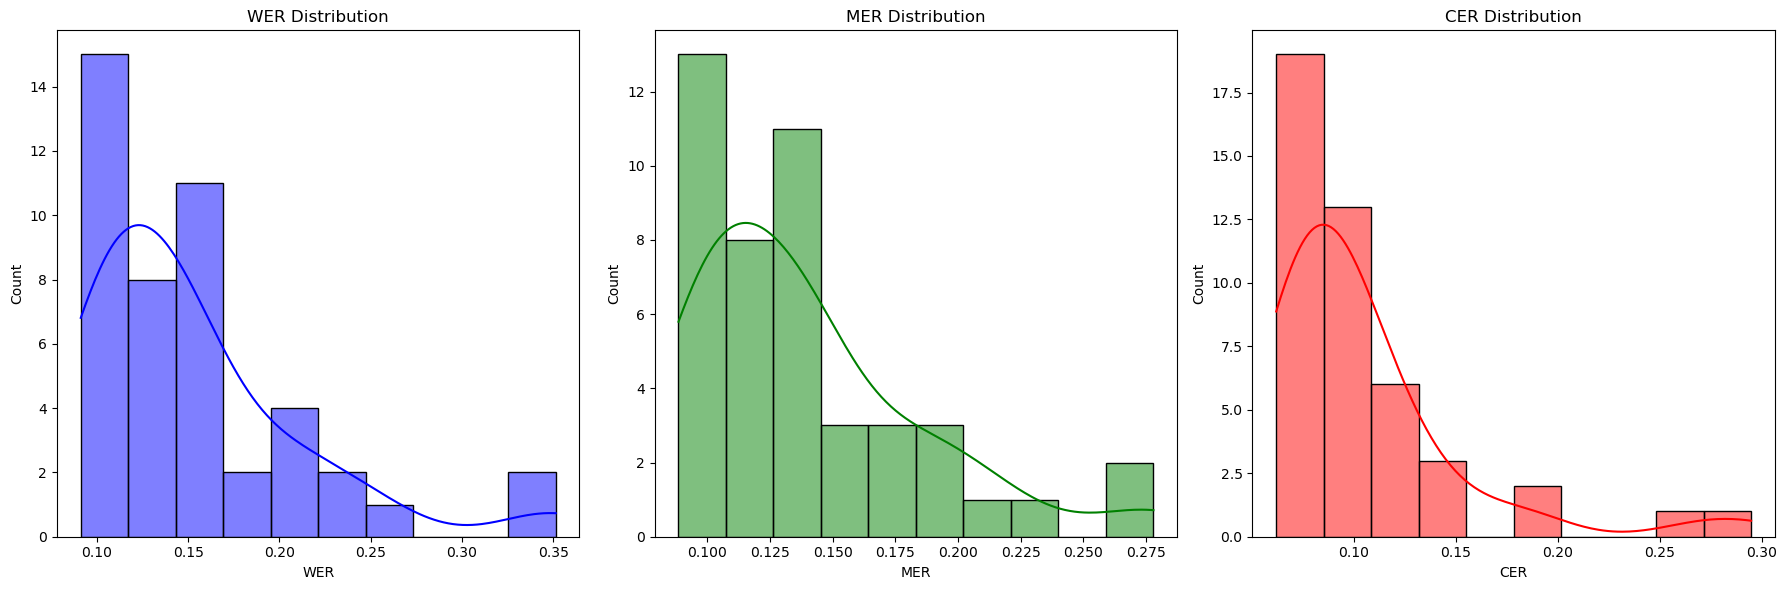

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for WER, MER, and CER
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(mergeddf['WER'], bins=10, kde=True, ax=axs[0], color='blue')
axs[0].set_title('WER Distribution')

sns.histplot(mergeddf['MER'], bins=10, kde=True, ax=axs[1], color='green')
axs[1].set_title('MER Distribution')

sns.histplot(mergeddf['CER'], bins=10, kde=True, ax=axs[2], color='red')
axs[2].set_title('CER Distribution')

plt.tight_layout()
plt.show()


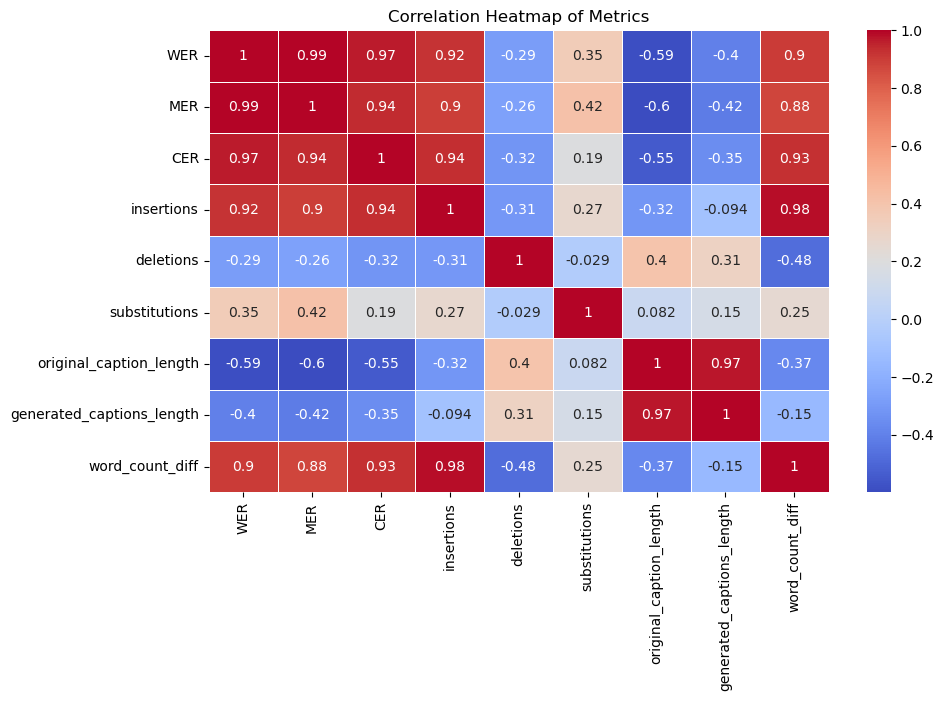

In [51]:
# Correlation heatmap for numeric columns
plt.figure(figsize=(10, 6))
sns.heatmap(mergeddf[['WER', 'MER', 'CER', 'insertions', 'deletions', 'substitutions', 
                'original_caption_length', 'generated_captions_length', 'word_count_diff']].corr(), 
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Metrics')
plt.show()


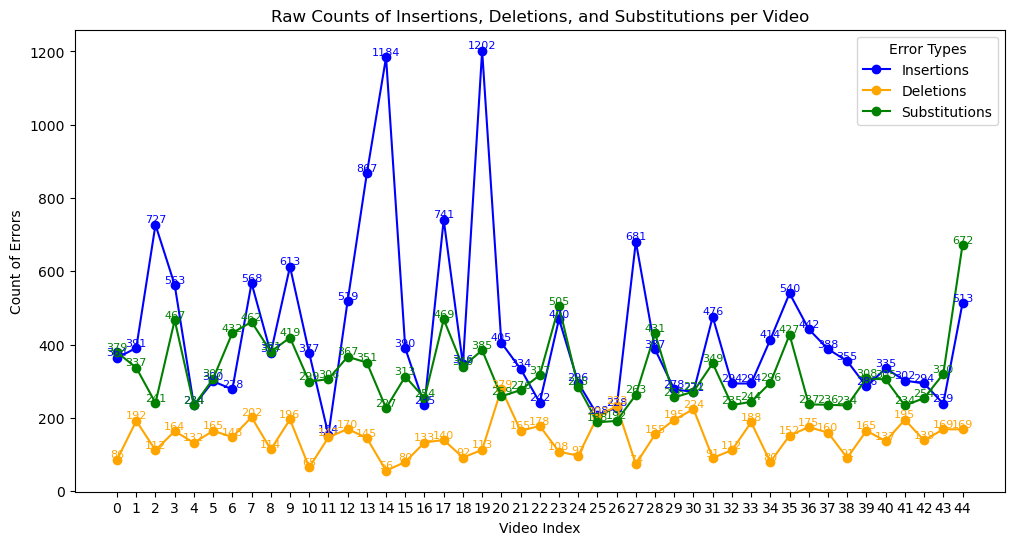

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the relevant columns
plt.figure(figsize=(12, 6))

# Plotting each error type
plt.plot(mergeddf.index, mergeddf['insertions'], marker='o', label='Insertions', color='blue')
plt.plot(mergeddf.index, mergeddf['deletions'], marker='o', label='Deletions', color='orange')
plt.plot(mergeddf.index, mergeddf['substitutions'], marker='o', label='Substitutions', color='green')

# Adding titles and labels
plt.title('Raw Counts of Insertions, Deletions, and Substitutions per Video')
plt.xlabel('Video Index')
plt.ylabel('Count of Errors')
plt.xticks(ticks=mergeddf.index)  # Display video indices on the x-axis
plt.legend(title='Error Types')

# Adding data labels on the lines
for i in range(len(mergeddf)):
    plt.text(i, mergeddf['insertions'].iloc[i], str(mergeddf['insertions'].iloc[i]), ha='center', va='bottom', fontsize=8, color='blue')
    plt.text(i, mergeddf['deletions'].iloc[i], str(mergeddf['deletions'].iloc[i]), ha='center', va='bottom', fontsize=8, color='orange')
    plt.text(i, mergeddf['substitutions'].iloc[i], str(mergeddf['substitutions'].iloc[i]), ha='center', va='bottom', fontsize=8, color='green')

plt.show()


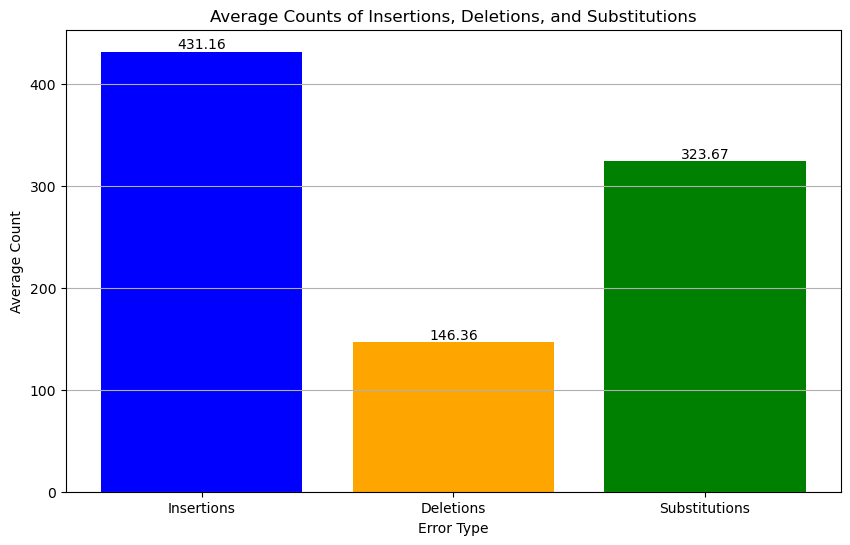

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the average counts
average_counts = {
    'Insertions': mergeddf['insertions'].mean(),
    'Deletions': mergeddf['deletions'].mean(),
    'Substitutions': mergeddf['substitutions'].mean()
}

# Create a DataFrame for visualization
average_counts_df = pd.DataFrame(list(average_counts.items()), columns=['Error Type', 'Average Count'])

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_counts_df['Error Type'], average_counts_df['Average Count'], color=['blue', 'orange', 'green'])

# Adding titles and labels
plt.title('Average Counts of Insertions, Deletions, and Substitutions')
plt.ylabel('Average Count')
plt.xlabel('Error Type')
plt.grid(axis='y')

# Adding data labels
for index, value in enumerate(average_counts_df['Average Count']):
    plt.text(index, value, f"{value:.2f}", ha='center', va='bottom')

plt.show()


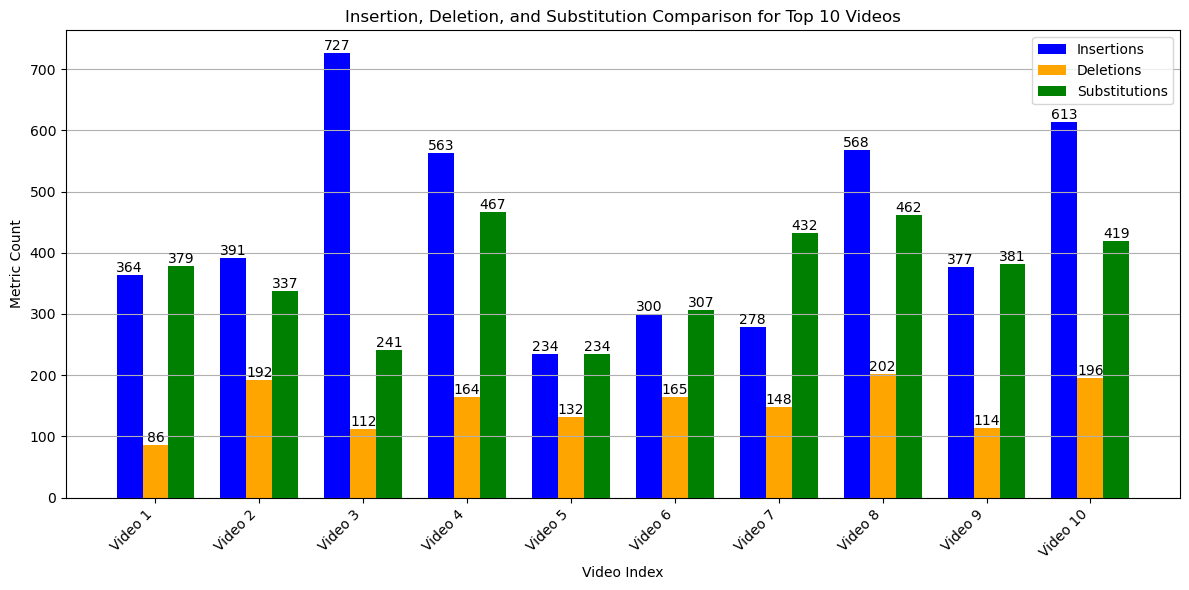

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the first 10 videos (or you can choose specific indices)
top_videos = mergeddf.head(10)

# Set up the bar chart
bar_width = 0.25
x = range(len(top_videos))  # X locations for the groups

# Create bars for each error type
plt.figure(figsize=(12, 6))
bars1 = plt.bar([p - bar_width for p in x], top_videos['insertions'], width=bar_width, label='Insertions', color='blue')
bars2 = plt.bar(x, top_videos['deletions'], width=bar_width, label='Deletions', color='orange')
bars3 = plt.bar([p + bar_width for p in x], top_videos['substitutions'], width=bar_width, label='Substitutions', color='green')

# Adding titles and labels
plt.title('Insertion, Deletion, and Substitution Comparison for Top 10 Videos')
plt.ylabel('Metric Count')
plt.xlabel('Video Index')
plt.xticks(x, [f'Video {i+1}' for i in range(len(top_videos))], rotation=45, ha='right')  # Show video names on the x-axis
plt.legend()
plt.grid(axis='y')

# Adding data labels
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f"{int(height)}", ha='center', va='bottom')

plt.tight_layout()
plt.show()
